In [58]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] 
plt.figure(figsize=(10, 6))

sns.set_palette('viridis')
sns.set(style='darkgrid')

In [ ]:
def mean_workers(row, idx, df):
    sum = 0
    workers = eval(df.at[idx, 'trust_in_agents'])
    for w in workers:
        sum += w[1]

    return sum/len(workers)

def obtener_tiempo_finalizacion(grupo):
    # Encontrar el máximo número de tareas completadas
    max_tareas = grupo['completed_tasks'].max()
    # Filtrar las filas con el máximo número de tareas completadas
    filas_max_tareas = grupo[grupo['completed_tasks'] == max_tareas]
    # Encontrar la fila con el tiempo mínimo entre las filas filtradas
    fila_tiempo_minimo = filas_max_tareas.loc[filas_max_tareas['time'].idxmin()]
    # Devolver el tiempo correspondiente a esa fila
    return fila_tiempo_minimo['time']

In [2]:
df = pd.read_csv('./Results/pm_log.csv')
df['simulacion_id'] = (df['time'].shift(1) > df['time']).cumsum() + 1

df['trust_agents_mean'] = df.apply(lambda row: mean_workers(row, row.name, df), axis=1)
df.head()
                 

time  pm_assignments  pm_ask_reports  pm_reassign  pm_work_on  \
0     0              12               0            0         NaN   
1    10               9               0            0         NaN   
2    20              12               0            0         NaN   
3    30               3               0            0         NaN   
4    40               3               0            0         NaN   

   pm_cooperations pm_priority  pm_optimize  \
0                0         NaN            0   
1                0         NaN            0   
2                0         NaN            0   
3                0         NaN            0   
4                0         NaN            0   

                                      pm_take_chance  problems_count  ...  \
0  Risk(Probability: 0.25, Impact: ['Resource5', ...               0  ...   
1  Risk(Probability: 0.25, Impact: ['Resource3', ...               0  ...   
2                                                NaN               0  ...   
3  Risk(Probability: 0.25, Impact: ['Resource3', ...               0  ...   
4  Risk(Probability: 0.25, Impact: ['Resource5', ...               1  ...   

   fail_task  total_tasks workers_number  resting_rate  collab_rate  pm_risky  \
0        NaN           50              4          0.75          0.0     0.700   
1        NaN           50              4          1.00          0.0     0.665   
2        NaN           50              4          0.25          0.0     0.630   
3        NaN           50              4          0.25          0.0     0.630   
4        NaN           50              4          0.75          0.0     0.595   

   workers_friendship  workers_motivation  workers_lazzyness  workers_psolv  
0            0.925367              106.00           0.732719           56.0  
1            0.925367              111.25           0.732719           56.0  
2            0.925367              108.50           0.732719           56.0  
3            0.925367              107.00           0.732719           56.0  
4            0.925367              107.25           0.732719           56.0  

[5 rows x 24 columns]

<Figure size 1000x600 with 0 Axes>

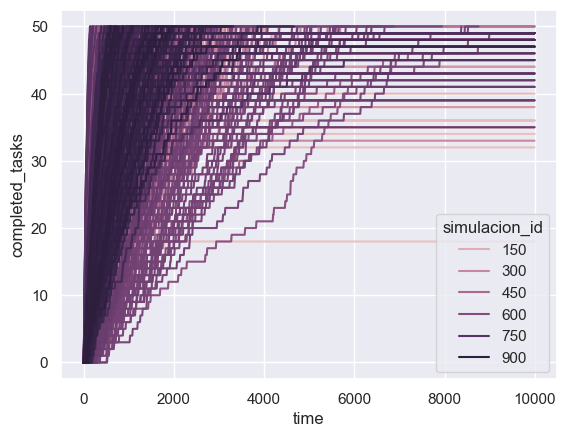

In [4]:



fig, ax = plt.subplots()
sns.lineplot(x='time', y='completed_tasks', hue='simulacion_id', data=df, ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x='time', y='cooperation_prob', hue='simulacion_id', data=df, ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x='time', y='trust_agents_mean', hue='simulacion_id', data=df, ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x='time', y='problems_count', hue='simulacion_id', data=df, ax=ax)
plt.show()

In [6]:


gcols = [
    # 'time',
    'simulacion_id',
    'pm_reassign',
    'pm_cooperations',
    # 'pm_motivate',
    'pm_take_chance',
    'problems_count',
    'cooperation_prob',
    'completed_tasks',
    'total_tasks',
    'workers_number',
    'resting_rate',	
    'collab_rate',
    'pm_risky',
    'workers_friendship', 'workers_motivation', 
    'workers_lazzyness', 'workers_psolv',
]

gagg = {
    'pm_reassign': 'sum',
    'pm_cooperations': 'sum',
    # 'pm_motivate': 'median',
    'pm_take_chance': 'count',
    'problems_count': 'max',
    'cooperation_prob': 'mean',
    'completed_tasks': 'max',
    'total_tasks': 'max',
    'workers_number': 'max',
    'resting_rate': 'mean',	
    'collab_rate': 'mean',
    'pm_risky': 'mean',
    'workers_friendship': 'mean', 
    'workers_motivation': 'mean', 
    'workers_lazzyness': 'mean', 
    'workers_psolv': 'mean',
    # 'time': obtener_tiempo_finalizacion,
}

df_summary = df[gcols].groupby(by='simulacion_id').agg(gagg)
tiempos_finalizacion = df.groupby('simulacion_id').apply(obtener_tiempo_finalizacion)
df_summary['time'] = tiempos_finalizacion

print(df_summary.shape)
df_summary.head()

/var/folders/z_/jz4f3stj0xq5g99z3sb19w3r0000gn/T/ipykernel_44619/1533992781.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tiempos_finalizacion = df.groupby('simulacion_id').apply(obtener_tiempo_finalizacion)


pm_reassign  pm_cooperations  pm_take_chance  problems_count  \
simulacion_id                                                                 
1                        0                5              69              29   
2                        0                0              20              34   
3                        0                4              20              29   
4                        0                0              19              28   
5                        0               12              50              34   

               cooperation_prob  completed_tasks  total_tasks  workers_number  \
simulacion_id                                                                   
1                      0.012017               46           50               4   
2                      0.803303               48           50               4   
3                      0.012265               46           50               4   
4                      0.707993               49           50               4   
5                      0.020034               46           50               4   

               resting_rate  collab_rate  pm_risky  workers_friendship  \
simulacion_id                                                            
1                   0.95825      0.00075 -0.127785            0.925367   
2                   0.95525      0.00000 -0.265465            0.925367   
3                   0.95775      0.00025 -0.272360            0.925367   
4                   0.95625      0.00000 -0.229905            0.925367   
5                   0.95625      0.00050 -0.228865            0.925367   

               workers_motivation  workers_lazzyness  workers_psolv  time  
simulacion_id                                                              
1                       125.83575           0.732719      57.971625  1680  
2                       125.81125           0.732719      60.850649  2110  
3                       126.11775           0.732719      62.274056  2180  
4                       125.78325           0.732719      63.647667  2060  
5                       125.95475           0.732719      68.043970  1930

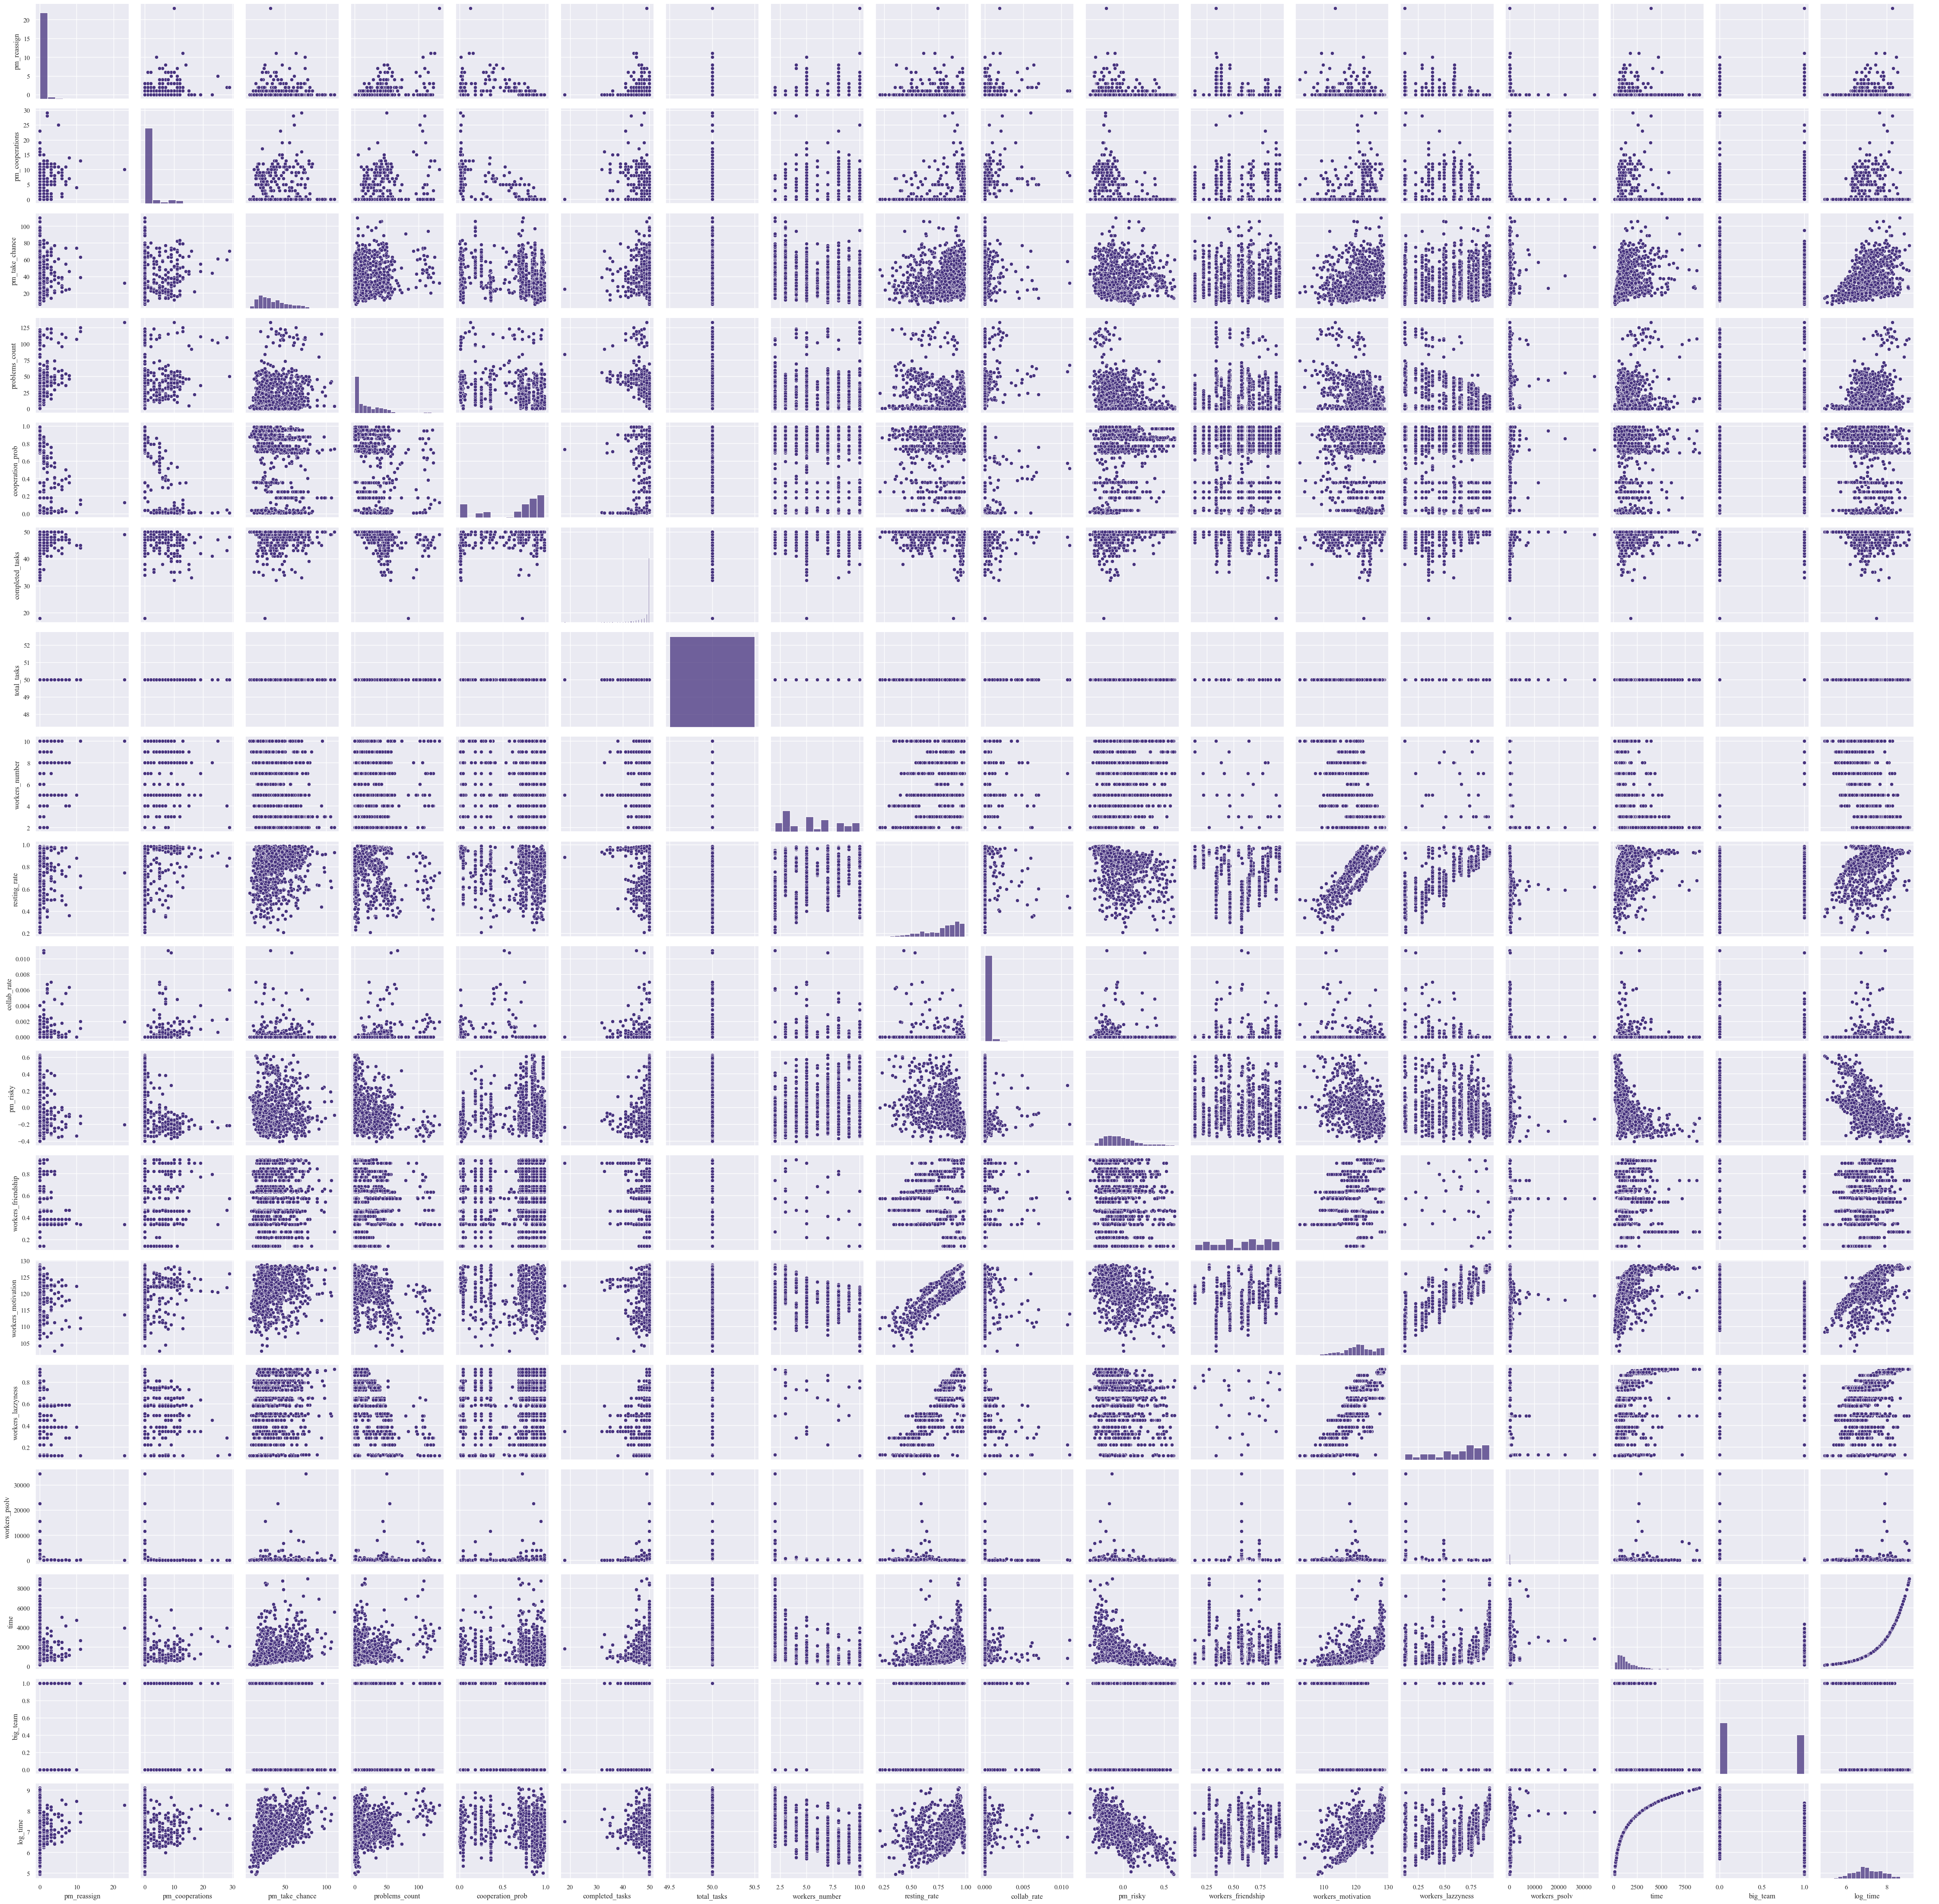

In [198]:
g = sns.PairGrid(df_summary)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

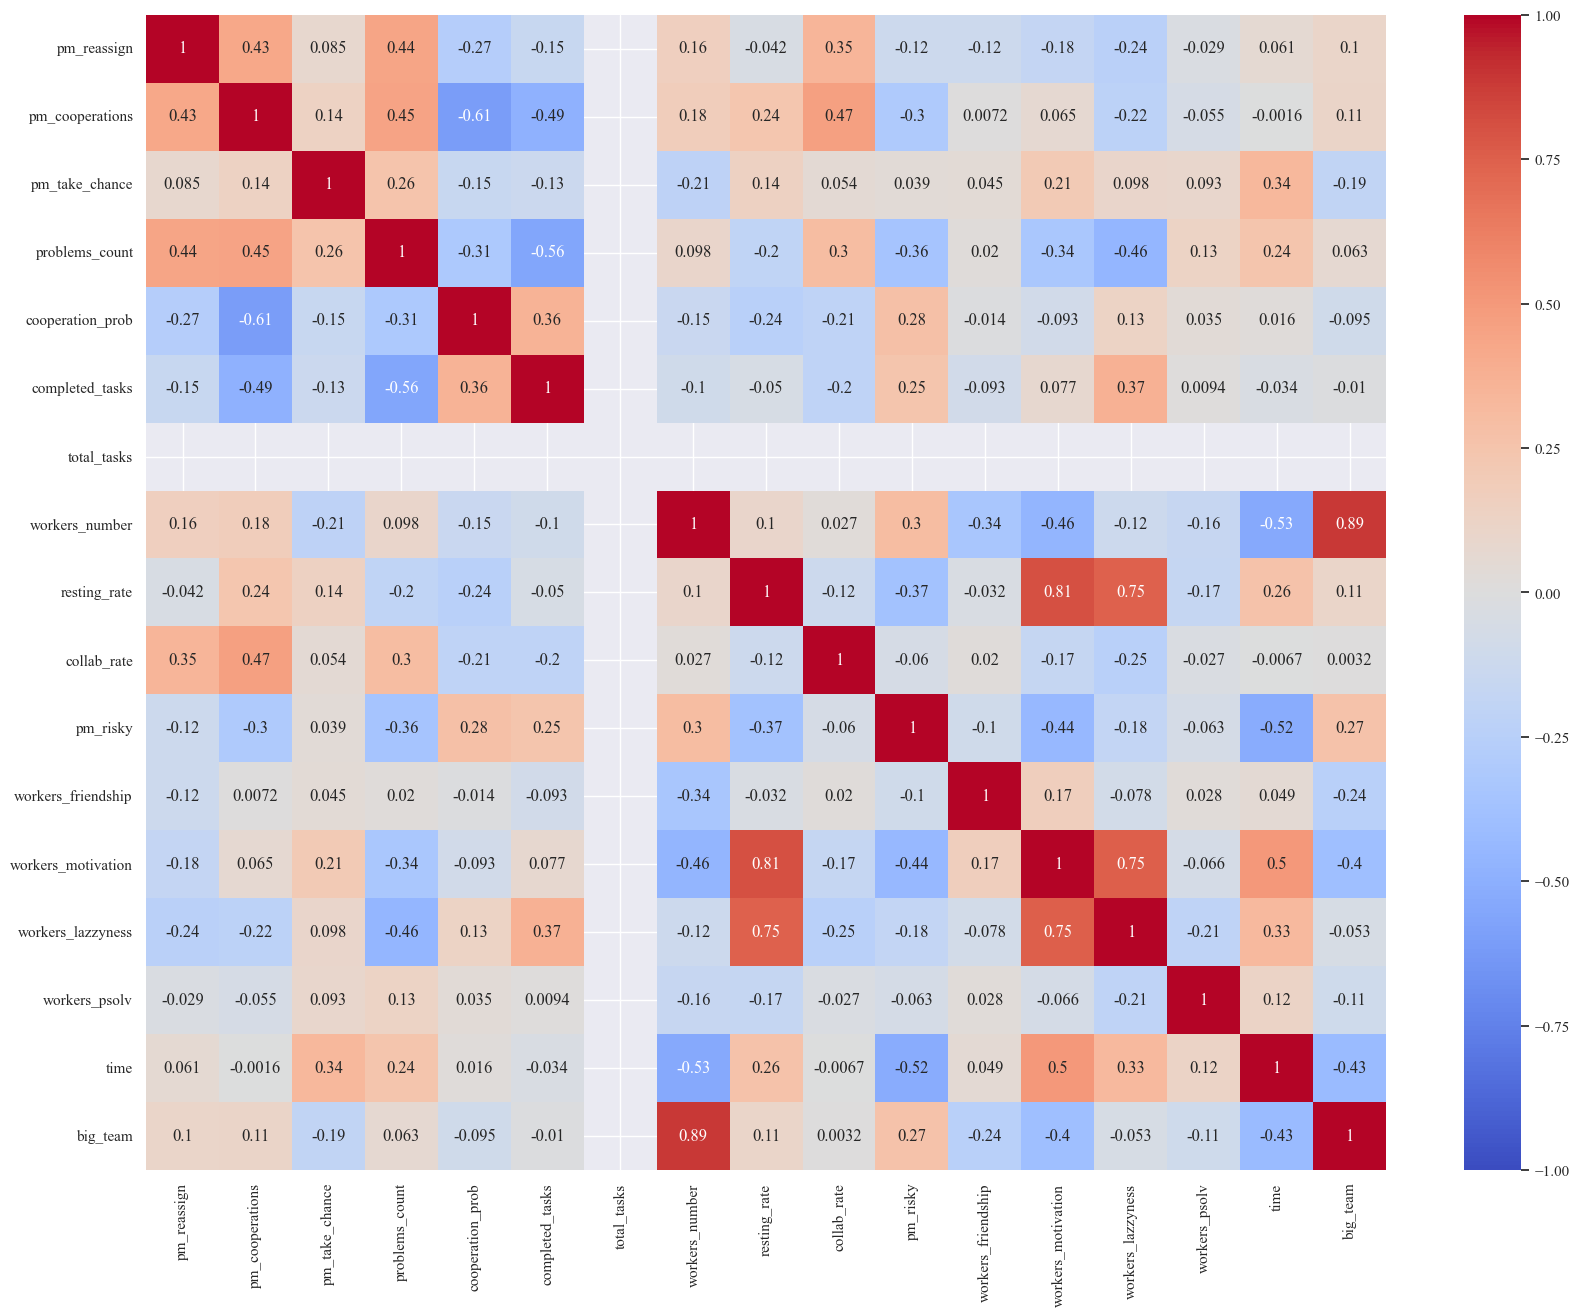

In [28]:
correlation_matrix = df_summary.corr()

fig, ax = plt.subplots(figsize=(20, 15)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',vmin=-1.0, vmax=1.0)
plt.show()

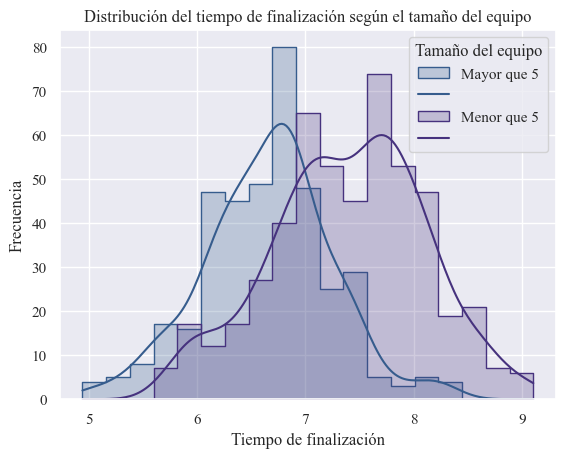

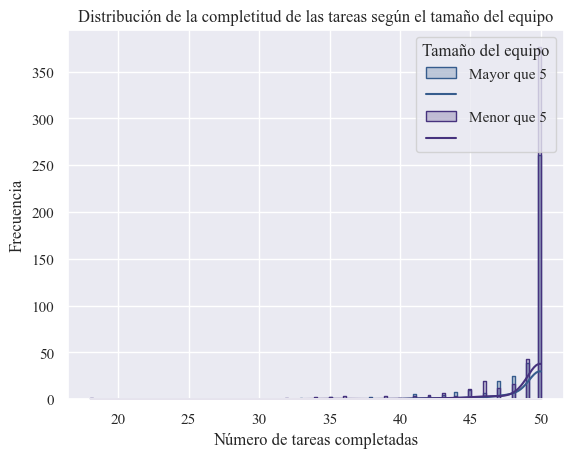

In [197]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] 

sns.set_palette('viridis')

df_summary['big_team'] = df_summary['workers_number'] > 5

sns.histplot(df_summary, x='log_time', hue='big_team', kde=True, element='step')
plt.legend(title='Tamaño del equipo', labels=['Mayor que 5','', 'Menor que 5', ''])
plt.title('Distribución del tiempo de finalización según el tamaño del equipo')
plt.xlabel('Tiempo de finalización')
plt.ylabel('Frecuencia')
plt.show()

sns.histplot(df_summary, x='completed_tasks', hue='big_team', kde=True, element='step', )
plt.legend(title='Tamaño del equipo', labels=['Mayor que 5','', 'Menor que 5', ''])
plt.title('Distribución de la completitud de las tareas según el tamaño del equipo')
plt.xlabel('Número de tareas completadas')
plt.ylabel('Frecuencia')
plt.show()

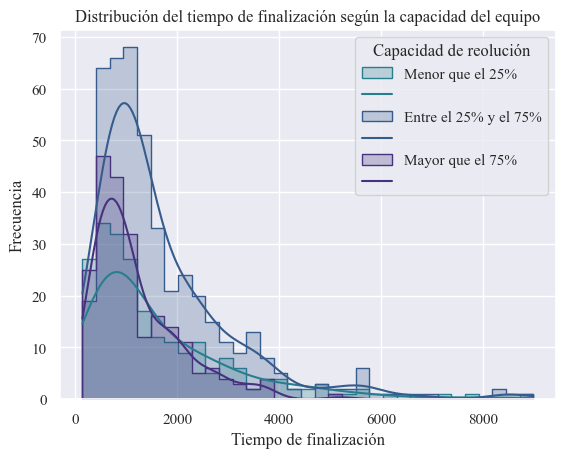

In [196]:
p25 = df_summary['workers_psolv'].quantile(0.25)
p75 = df_summary['workers_psolv'].quantile(0.75)

df_summary['cat_psolv'] = np.select(
    [df_summary['workers_psolv'] < p25, df_summary['workers_psolv'] < p75],
    ['low', 'medium'],
    default='high',
)

sns.histplot(df_summary, x='time', hue = 'cat_psolv', kde=True, element='step')
plt.legend(
    title = 'Capacidad de reolución', 
    labels = ['Menor que el 25%', '', 'Entre el 25% y el 75%', '', 'Mayor que el 75%', '']
)
plt.title('Distribución del tiempo de finalización según la capacidad del equipo')
plt.xlabel('Tiempo de finalización')
plt.ylabel('Frecuencia')
plt.show()


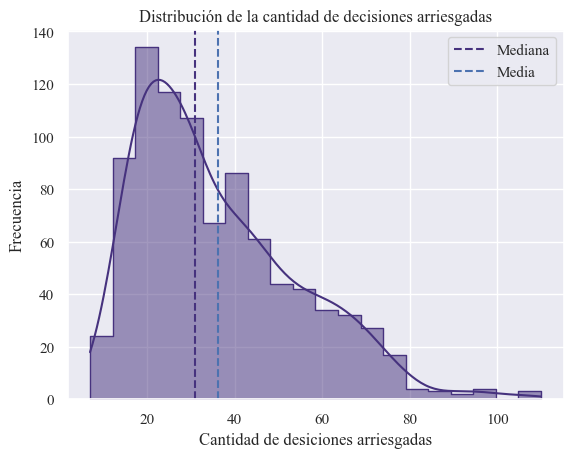

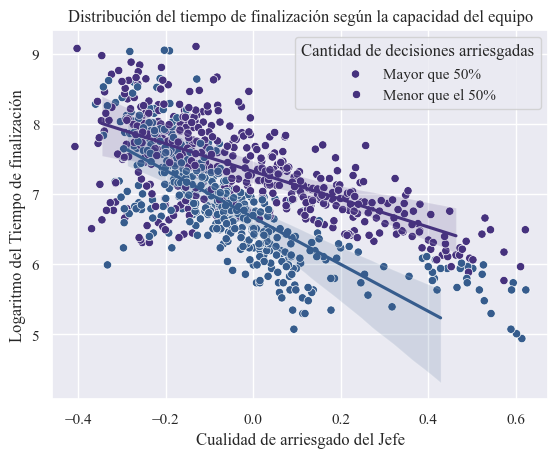

In [171]:
fig, ax = plt.subplots()
sns.histplot(df_summary, x='pm_take_chance', kde=True, element='step', ax=ax)
plt.axvline(df_summary['pm_take_chance'].median(), linestyle='--', label='Mediana')
plt.axvline(df_summary['pm_take_chance'].mean(), color='b', linestyle='--', label='Media')
plt.title('Distribución de la cantidad de decisiones arriesgadas')
plt.xlabel('Cantidad de desiciones arriesgadas')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()



pm_take_chance_median = df_summary['pm_take_chance'].median()
df_summary['cat_take_chance'] = np.where(df_summary['pm_take_chance'] > pm_take_chance_median, 'high', 'low')


fig, ax = plt.subplots()
sns.scatterplot(df_summary, y='log_time', x='pm_risky', hue='cat_take_chance', ax = ax)
ax.legend(
    title = 'Cantidad de decisiones arriesgadas', 
    labels = ['Mayor que 50%', 'Menor que el 50%']
)
for category in df_summary['cat_take_chance'].unique():
    sns.regplot(
        df_summary[np.logical_and(df_summary['cat_take_chance'] == category, df_summary['pm_take_chance'])].sample(40,random_state=42),
        x='pm_risky', y='log_time', label=category,
        scatter=False, ax=ax
    )

plt.title('Distribución del tiempo de finalización según la capacidad del equipo')
plt.xlabel('Cualidad de arriesgado del Jefe')
plt.ylabel('Logaritmo del Tiempo de finalización')
plt.show()




## Distribución del Tiempo de Finalización

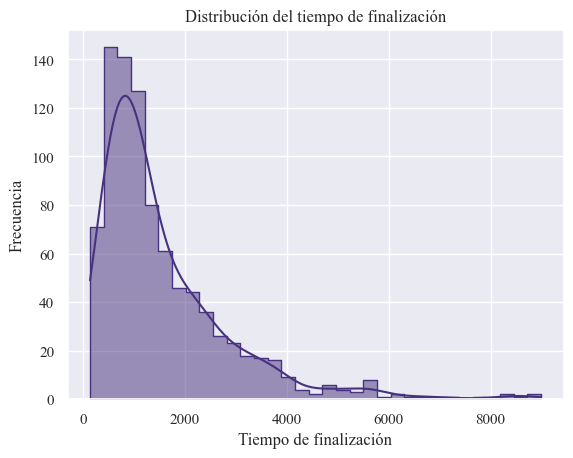

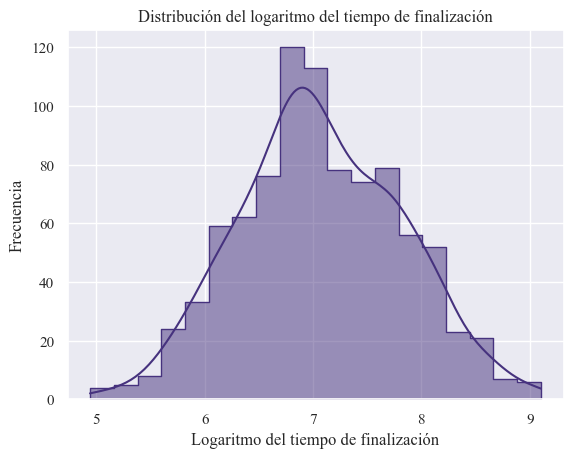

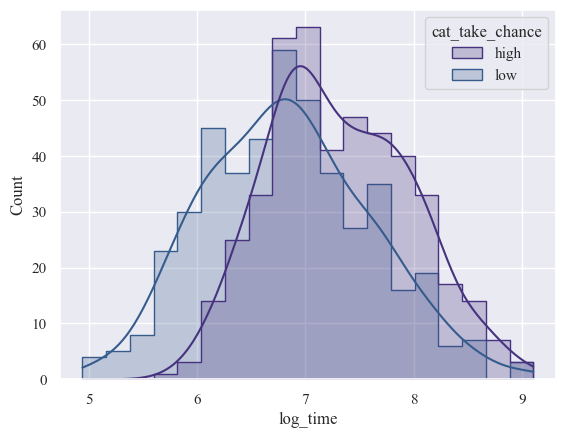

In [199]:
sns.histplot(df_summary, x='time', kde=True, element='step')
plt.title('Distribución del tiempo de finalización')
plt.xlabel('Tiempo de finalización')
plt.ylabel('Frecuencia')
plt.show()

df_summary['log_time'] = np.log(df_summary['time'])

sns.histplot(df_summary, x='log_time', kde=True, element='step')
plt.title('Distribución del logaritmo del tiempo de finalización')
plt.xlabel('Logaritmo del tiempo de finalización')
plt.ylabel('Frecuencia')
plt.show()

sns.histplot(df_summary, x='log_time', hue = 'cat_take_chance', kde=True, element='step')
# plt.legend(
#     title = 'Capacidad de reolución', 
#     labels = ['Menor que el 25%', '', 'Entre el 25% y el 75%', '', 'Mayor que el 75%', '']
# )
# plt.title('Distribución del tiempo de finalización según la capacidad del equipo')
# plt.xlabel('Tiempo de finalización')
# plt.ylabel('Frecuencia')
plt.show()

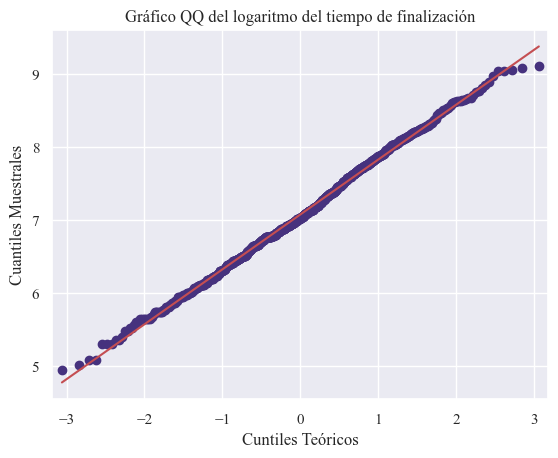

In [191]:
fig = sm.qqplot(df_summary['log_time'], line='s')
plt.title('Gráfico QQ del logaritmo del tiempo de finalización')
plt.ylabel('Cuantiles Muestrales')
plt.xlabel('Cuntiles Teóricos')
plt.show()

In [194]:
mu, sigma = st.norm.fit(df_summary['log_time'])
d_stat, p_value = st.kstest(df_summary['log_time'], 'norm', args=(mu, sigma))

print(f"d_stat = {d_stat}, p-value = {p_value}")
print(f"mu: {mu}, sigma: {sigma}")

d_stat = 0.030847385790498172, p-value = 0.35145252107688896
mu: 7.0718111649513355, sigma: 0.7520750306544763


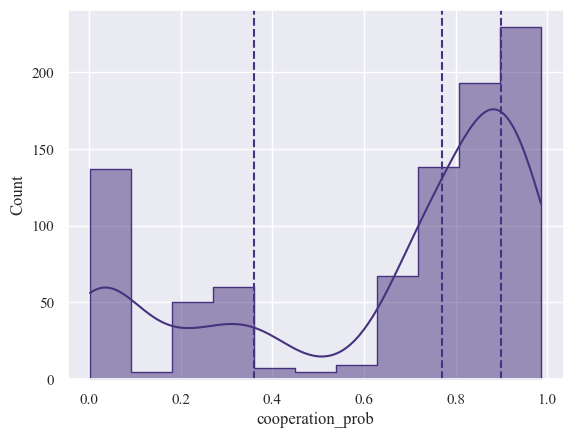

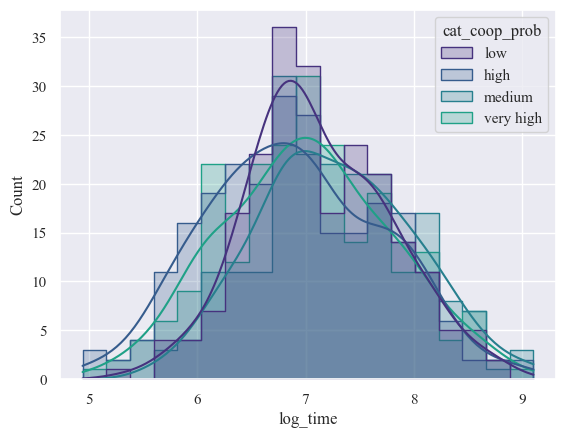

In [189]:
median = df_summary['cooperation_prob'].median()
p25 = df_summary['cooperation_prob'].quantile(0.25)
p75 = df_summary['cooperation_prob'].quantile(0.75)

sns.histplot(df_summary, x='cooperation_prob', kde=True, element='step')
plt.axvline(median, linestyle='--', label='Mediana')
plt.axvline(p25, linestyle='--', label='Mediana')
plt.axvline(p75, linestyle='--', label='Mediana')
# plt.legend(
#     title = 'Capacidad de reolución', 
#     labels = ['Menor que el 25%', '', 'Entre el 25% y el 75%', '', 'Mayor que el 75%', '']
# )
# plt.title('Distribución del tiempo de finalización según la capacidad del equipo')
# plt.xlabel('Tiempo de finalización')
# plt.ylabel('Frecuencia')
plt.show()

df_summary['cat_coop_prob'] =  np.select(
    [df_summary['cooperation_prob']<p25, df_summary['cooperation_prob']<median, df_summary['cooperation_prob']<p75],
    ['low', 'medium', 'high'],
    default='very high'
)

fig, ax = plt.subplots()
sns.histplot(df_summary, x='log_time', hue='cat_coop_prob', kde=True, element='step', ax=ax)
plt.show()
